In [1]:
import pyspark
from pyspark.sql import SparkSession

# create the SparkSession
spark = SparkSession.builder.appName('DemoApp').getOrCreate()

df = spark.read.load("C:/Users/phil/Desktop/Data Engineering Boot Camp/Code/Python/Spark/Sales_October_2019.csv", format="csv", header = True,inferSchema = True)

In [2]:
df.printSchema()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)



In [ ]:
df.columns

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [ ]:
df.dtypes

[('Order ID', 'int'),
 ('Product', 'string'),
 ('Quantity Ordered', 'int'),
 ('Price Each', 'double'),
 ('Order Date', 'string'),
 ('Purchase Address', 'string')]

In [ ]:
df.head()

Row(Order ID=259358, Product='34in Ultrawide Monitor', Quantity Ordered=1, Price Each=379.99, Order Date='10/28/19 10:56', Purchase Address='609 Cherry St, Dallas, TX 75001')

In [ ]:
df.show(truncate=False)

+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|Order ID|Product                   |Quantity Ordered|Price Each|Order Date    |Purchase Address                         |
+--------+--------------------------+----------------+----------+--------------+-----------------------------------------+
|259358  |34in Ultrawide Monitor    |1               |379.99    |10/28/19 10:56|609 Cherry St, Dallas, TX 75001          |
|259359  |27in 4K Gaming Monitor    |1               |389.99    |10/28/19 17:26|225 5th St, Los Angeles, CA 90001        |
|259360  |AAA Batteries (4-pack)    |2               |2.99      |10/24/19 17:20|967 12th St, New York City, NY 10001     |
|259361  |27in FHD Monitor          |1               |149.99    |10/14/19 22:26|628 Jefferson St, New York City, NY 10001|
|259362  |Wired Headphones          |1               |11.99     |10/07/19 16:10|534 14th St, Los Angeles, CA 90001       |
|259363  |AAA Ba

In [ ]:
df.select("Product","Price Each","Quantity Ordered","Order Date").groupby("Product").sum().show()

+--------------------+------------------+---------------------+
|             Product|   sum(Price Each)|sum(Quantity Ordered)|
+--------------------+------------------+---------------------+
|    Wired Headphones| 25119.05000000091|                 2274|
|  Macbook Pro Laptop|          892500.0|                  525|
|Apple Airpods Hea...|          249750.0|                 1674|
|              iPhone|          500500.0|                  716|
|                null|              null|                 null|
|Lightning Chargin...| 36179.00000000046|                 2570|
|Bose SoundSport H...|143985.60000000178|                 1465|
|USB-C Charging Cable| 29193.85000000119|                 2669|
|AAA Batteries (4-...| 6694.609999999667|                 3362|
|        20in Monitor|46965.729999999945|                  428|
|    27in FHD Monitor|118642.09000000157|                  792|
|     Vareebadd Phone|           81200.0|                  203|
|34in Ultrawide Mo...|254973.28999999774

In [ ]:
df.groupBy('Product').sum('Price Each').show()

+--------------------+------------------+
|             Product|   sum(Price Each)|
+--------------------+------------------+
|    Wired Headphones| 25119.05000000091|
|  Macbook Pro Laptop|          892500.0|
|Apple Airpods Hea...|          249750.0|
|              iPhone|          500500.0|
|                null|              null|
|Lightning Chargin...| 36179.00000000046|
|Bose SoundSport H...|143985.60000000178|
|USB-C Charging Cable| 29193.85000000119|
|AAA Batteries (4-...| 6694.609999999667|
|        20in Monitor|46965.729999999945|
|    27in FHD Monitor|118642.09000000157|
|     Vareebadd Phone|           81200.0|
|34in Ultrawide Mo...|254973.28999999774|
|            LG Dryer|           30000.0|
|AA Batteries (4-p...| 8601.600000000228|
|        Google Phone|          358200.0|
|       Flatscreen TV|          157200.0|
|  LG Washing Machine|           36600.0|
|             Product|              null|
|27in 4K Gaming Mo...| 280402.8099999972|
+--------------------+------------

array([[<Axes: title={'center': 'Order ID'}>,
        <Axes: title={'center': 'Quantity Ordered'}>],
       [<Axes: title={'center': 'Price Each'}>, <Axes: >]], dtype=object)

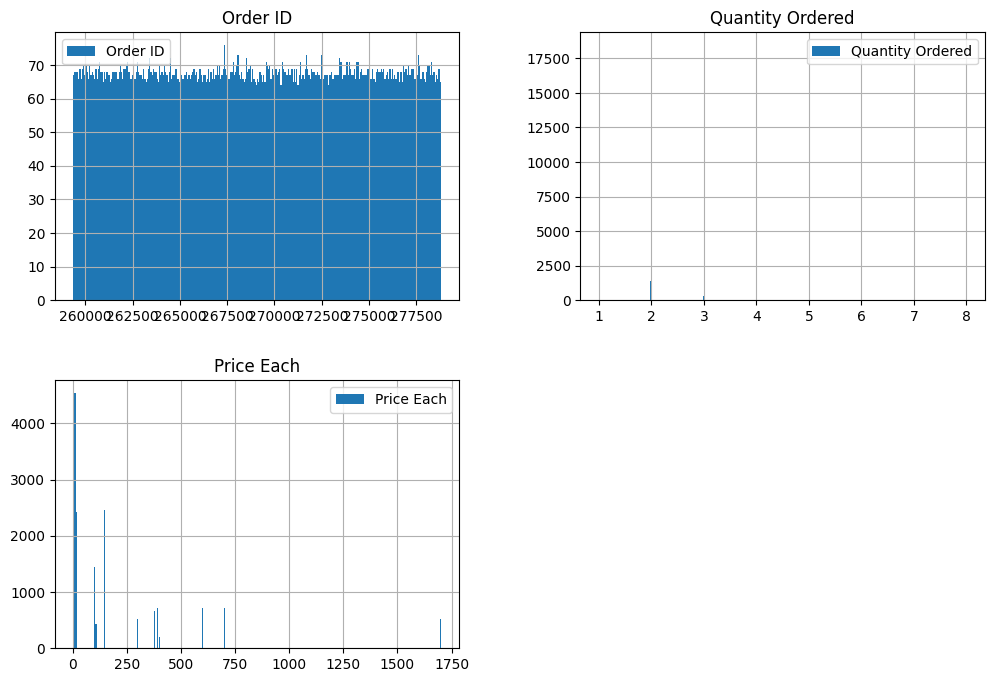

In [ ]:
df_sample_pandas = df.toPandas()
df_sample_pandas.hist(bins=300, figsize=(12,8),  legend=True)

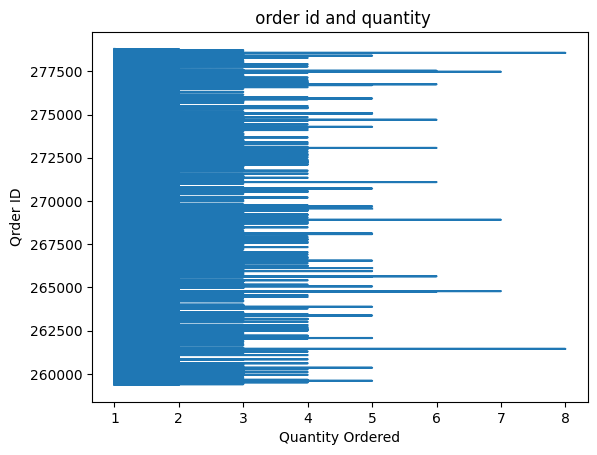

In [3]:
import matplotlib.pyplot as plt
roc = df.toPandas()
plt.plot(roc['Quantity Ordered'], roc['Order ID'])

plt.ylabel('Qrder ID')
plt.xlabel('Quantity Ordered')
plt.title(' order id and quantity')
plt.show()


+--------+--------------------+----------------+----------+--------------+--------------------+
|Order ID|             Product|Quantity Ordered|Price Each|    Order Date|    Purchase Address|
+--------+--------------------+----------------+----------+--------------+--------------------+
|  259358|34in Ultrawide Mo...|               1|    379.99|10/28/19 10:56|609 Cherry St, Da...|
|  259359|27in 4K Gaming Mo...|               1|    389.99|10/28/19 17:26|225 5th St, Los A...|
|  259360|AAA Batteries (4-...|               2|      2.99|10/24/19 17:20|967 12th St, New ...|
|  259361|    27in FHD Monitor|               1|    149.99|10/14/19 22:26|628 Jefferson St,...|
|  259362|    Wired Headphones|               1|     11.99|10/07/19 16:10|534 14th St, Los ...|
|  259363|AAA Batteries (4-...|               1|      2.99|10/01/19 18:55|976 Lake St, New ...|
|  259364|    Wired Headphones|               1|     11.99|10/29/19 11:02|874 North St, Los...|
|  259365|Lightning Chargin...|         

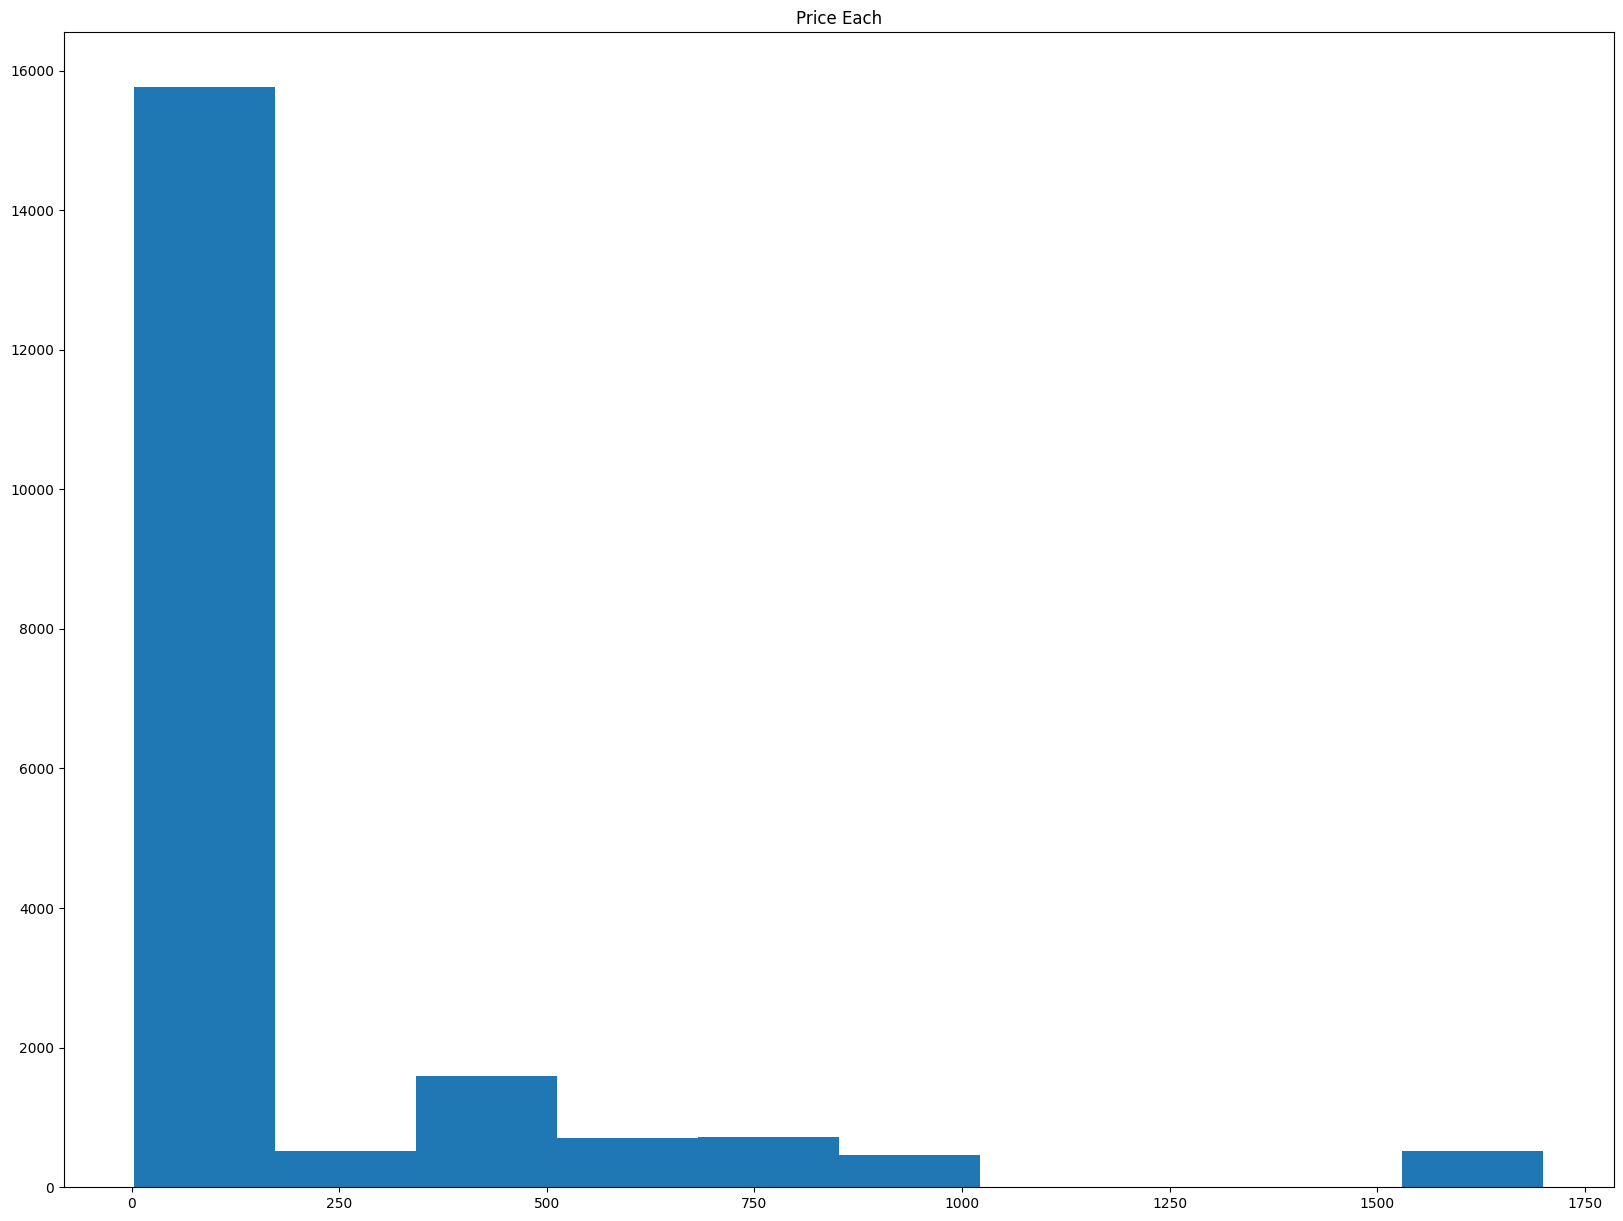

In [4]:
from handyspark import *
hdf = df.toHandy()
hdf.show()
fig,ax = plt.subplots(figsize=(20,15))
hdf.cols['Price Each'].hist(ax=ax)
plt.show()


In [ ]:
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
  .save()


In [ ]:
df.select("Order ID","Product").write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.salesdata") \
  .option("user", "root") \
  .option("password", "password") \
.option("header","false")\
  .save()
